<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/6-Ejercicio_Jumanji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

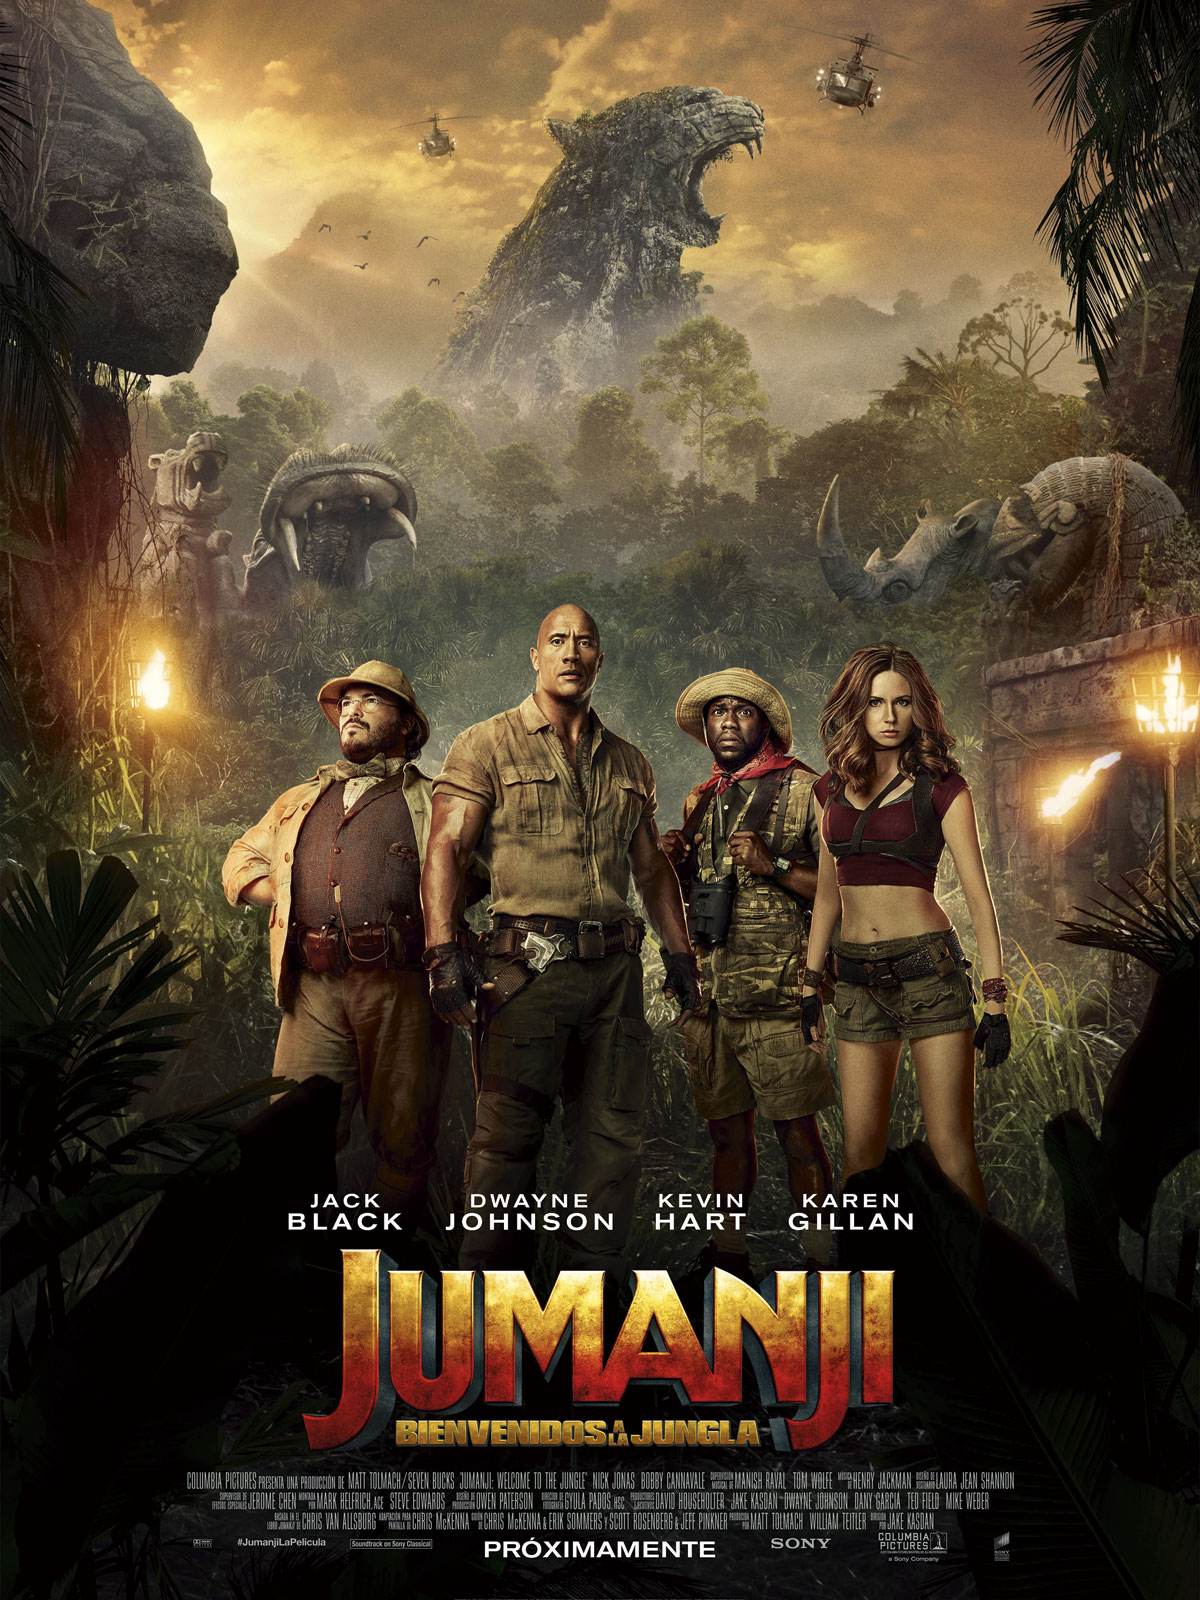

# Ejercicio Jumanji - Bienvenidos a la jungla

Wellcome to Jumanji dear adventurers. Unfortunately not everything are good news, some players have been playing to the game and, as a result of they dumb plays, a stampede of cats and dogs is now running in the real world.

As a fellow explorer I am sure that you understand the urgency of the situation. To solve it, we need to create a computer vision algorithm using CNNs to detect the cats and the dogs.

In order to do so we require the following steps:

- Create an image preprocessing pipeline to treat the images that we are providing. Perform data augmentation over the dataset, at least rotations.

- Test several architechtures (at least 3) and evaluate their performance over the dataset.

- Visualize the feature maps of some of the early and late layers of the models developed. ¿Is there any feature which could be explained through them?

- Finally select the model which performs the best over the whole dataset and explain why.

Fellow adventurer, thanks for your time, Jumanji will not forget your efforts.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2022-01-18 17:22:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  86.9MB/s    in 0.8s    

2022-01-18 17:22:21 (86.9 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/val

# DATA AUGMENTATION + ROTACIÓN MANUAL (Luego no lo utilizo ya que no me aclaro para guardar las imágenes antiguas + nuevas en una variable "X")

In [4]:
import tensorflow.keras as keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D

from keras.utils import np_utils
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import optimizers
from keras import models

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## Pre Procesado

In [6]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.252.jpg")
img.size

(149, 113)

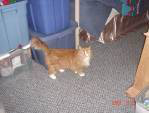

In [7]:
img

In [8]:
img2 = Image.open("cats_and_dogs_filtered/train/cats/cat.226.jpg")
img2.size

(499, 375)

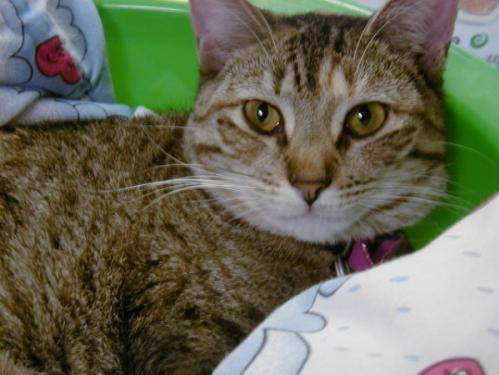

In [9]:
img2

In [10]:
#cada imagen tiene un tamaño y una resolución diferente

In [11]:
#1. ajuste resolución. Alternativas
# - cambio resolución
# - cropping (reocortado)
# - padding (relleno)

#2. data aumentation a cada conjunto

In [12]:
def change_resolution(img, desired_resolution):
  width, height = img.size
  if width > height:
    aspect_relatio = width/height
    new_width = desired_resolution
    new_height = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  else:
    aspect_relatio = height/width
    new_height = desired_resolution
    new_width = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  return resized_img

def pad_img(img, desired_resolution):
  width, height = img.size
  array = np.array(img)
  if width > height:
    total_pad = desired_resolution - height
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((pad_0, pad_1),(0,0),(0,0)))
    else:
      padded_image = np.pad(array, ((pad, pad),(0,0),(0,0)))
  else:
    total_pad = desired_resolution - width
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((0,0),(pad_0, pad_1),(0,0)))
    else:
      padded_image = np.pad(array, ((0,0),(pad, pad),(0,0)))
  return padded_image

In [13]:
import os

In [14]:
cat_files = os.listdir("cats_and_dogs_filtered/train/cats")#libreria os. para listar un directorio
dog_files = os.listdir("cats_and_dogs_filtered/train/dogs")

In [15]:
preprocess_path = "preprocessed_dataset/train/cats"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in cat_files:
  path = os.path.join("cats_and_dogs_filtered/train/cats", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 64)
  padded_img = pad_img(resized_img, 64)
  print(padded_img.shape)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  preprocess_image = Image.fromarray(padded_img)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  preprocess_image.save(save_path)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

In [16]:
preprocess_path = "preprocessed_dataset/train/dogs"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in dog_files:
  path = os.path.join("cats_and_dogs_filtered/train/dogs", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 64)
  padded_img = pad_img(resized_img, 64)
  print(padded_img.shape)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  preprocess_image = Image.fromarray(padded_img)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  preprocess_image.save(save_path)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Rotar + filtro borroso

In [18]:
from PIL import ImageFilter

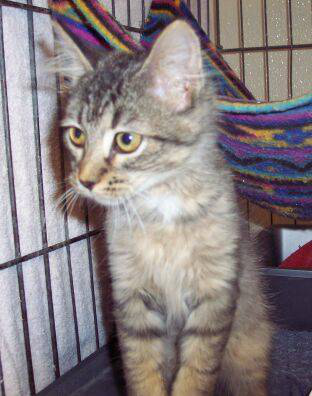

In [19]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
img

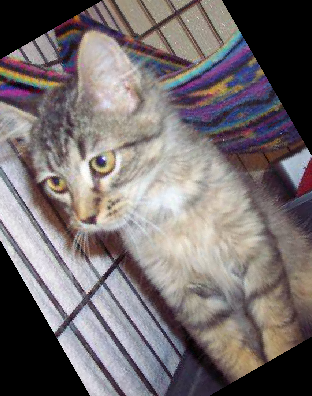

In [20]:
img = img.rotate(30)
img

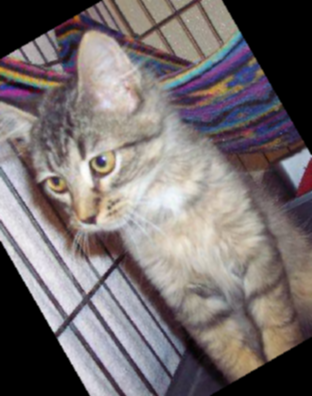

In [21]:
img.filter(ImageFilter.BoxBlur(0.5))

In [22]:
cat_files_ = os.listdir("preprocessed_dataset/train/cats")[0:100] #libreria os. para listar un directorio
dog_files_ = os.listdir("preprocessed_dataset/train/dogs")[0:100]

In [23]:
def change_rotation(img, desired_angle):
  redesign = img.rotate(30)
  redesign = redesign.filter(ImageFilter.BoxBlur(0.5))
  return redesign

In [24]:
preprocess_path = "preprocessed_dataset/train/cats2"

#preprocess_path = "preprocessed_dataset/train/dogs"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in cat_files_:
  path = os.path.join("preprocessed_dataset/train/cats", file_) 
  #unir el nombre del directorio con el numero del fichero
  img = Image.open(path)
  redesign = change_rotation(img, 30)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  #preprocess_image = Image.fromarray(redesign).
  #save_path = os.path.join("preprocessed_dataset/train/cats", file_)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  redesign.save(save_path)

In [25]:
preprocess_path = "preprocessed_dataset/train/dogs2"

#preprocess_path = "preprocessed_dataset/train/dogs"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in dog_files_:
  path = os.path.join("preprocessed_dataset/train/dogs", file_) 
  #unir el nombre del directorio con el numero del fichero
  img = Image.open(path)
  redesign = change_rotation(img, 30)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  #preprocess_image = Image.fromarray(redesign).
  #save_path = os.path.join("preprocessed_dataset/train/cats", file_)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  redesign.save(save_path)

# Directorios (la parte de arriba realmente no la utilizo)

In [80]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import optimizers
from keras import models
from glob import glob
import cv2

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import SVG, display, clear_output
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

In [81]:
#guardo directorio

train_data_dir = 'cats_and_dogs_filtered/train'
validation_data_dir = 'cats_and_dogs_filtered/validation'

batch_size = 32

In [82]:
#normalizo Pixeles (canal RGB) entre 0-1
preprocess_input = lambda x:x/255. 

In [83]:
# dimensiones a las que vamos a llevar las imágenes
img_width, img_height = 150, 150
normed_dims = (img_height, img_width)

# Modelos Aquitecturas

In [84]:
#Baseline CNN ----- ESTE QUITAR
''''
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=normed_dims+(3,)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((4,4)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
'''

'\'\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), activation=\'relu\',\n                 input_shape=normed_dims+(3,)))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Conv2D(64, (3,3), activation=\'relu\', padding=\'same\'))\nmodel.add(MaxPooling2D((4,4)))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(2, activation=\'softmax\'))\nmodel.compile(loss=\'categorical_crossentropy\',\n              optimizer="adam",\n              metrics=[\'accuracy\'])\n'

In [31]:
#SOLO DARLE A INTRO SI QUIERO SIMULAR ESTE MODELO

'''
#################### ARQUITECTURA 1 ####################
'''


def define_model_1():
  model = Sequential()

  #FEATURE EXTRACTION
  layer1 = Conv2D(32, (3,3), activation='relu', input_shape=normed_dims+(3,))
  MaxPool1 = MaxPooling2D((2,2))

  layer2 = Conv2D(64, (3,3), activation='relu', padding='same')
  MaxPool2 = MaxPooling2D((4,4))


  #CLASSIFIER
  flatten = Flatten()
  layer3 = Dense(32, activation='relu', kernel_regularizer="l2") # regularizador L2
  drop = Dropout(0.5)
  output = Dense(2, activation='softmax')


  #MODELO
  model.add(layer1)
  model.add(MaxPool1)
  model.add(layer2)
  model.add(MaxPool2)

  model.add(flatten)
  model.add(layer3)
  model.add(drop)
  model.add(output)

  model.compile(loss='categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
  
  return model

Luego borrar estas fotos

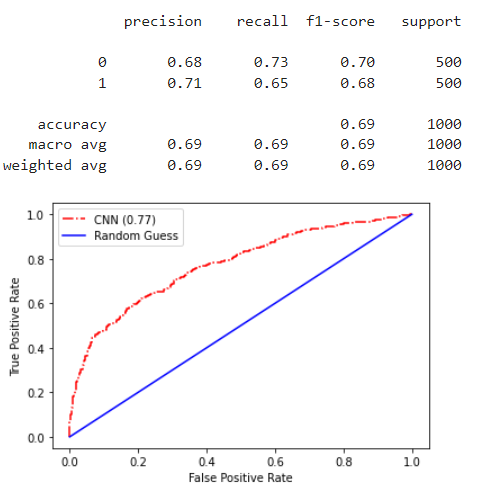

In [ ]:
#SOLO DARLE A INTRO SI QUIERO SIMULAR ESTE MODELO

'''
#################### ARQUITECTURA 2 ####################
'''

def define_model_2():
  model = Sequential()
  
  #FEATURE EXTRACTION
  layer1 = Conv2D(32, (3,3), activation='relu', input_shape=normed_dims+(3,))
  MaxPool1 = MaxPooling2D((2,2))

  layer2 = Conv2D(64, (3,3), activation='relu', padding='same')
  MaxPool2 = MaxPooling2D((4,4))

  layer3 = Conv2D(64, (3,3), activation='relu', padding='same')
  MaxPool3 = MaxPooling2D((4,4))


  #CLASSIFIER
  flatten = Flatten()
  drop1 = Dropout(0.5)
  layer4 = Dense(32, activation='relu') # regularizador L2

  drop2 = Dropout(0.5)

  layer5 = Dense(24, activation='relu', kernel_regularizer="l2") # regularizador L2
  drop3 = Dropout(0.5)

  output = Dense(2, activation='softmax')


  #MODELO
  model.add(layer1)
  model.add(MaxPool1)
  model.add(layer2)
  model.add(MaxPool2)
  model.add(layer3)
  model.add(MaxPool3)


  model.add(flatten)
  model.add(drop1)
  model.add(layer4)
  model.add(drop2)
  model.add(layer5)
  model.add(drop3)
  model.add(output)

  model.compile(loss='categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
  
  return model

Luego borrar estas imagenes

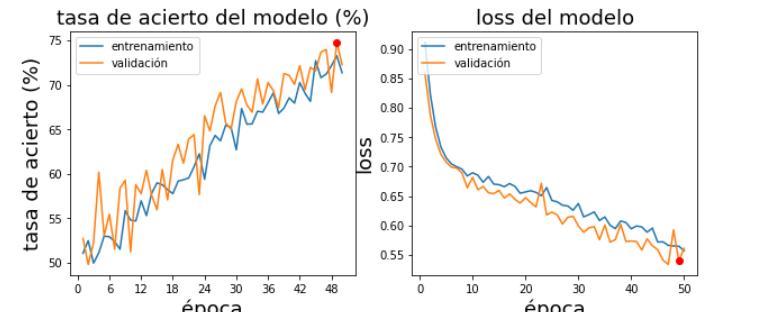

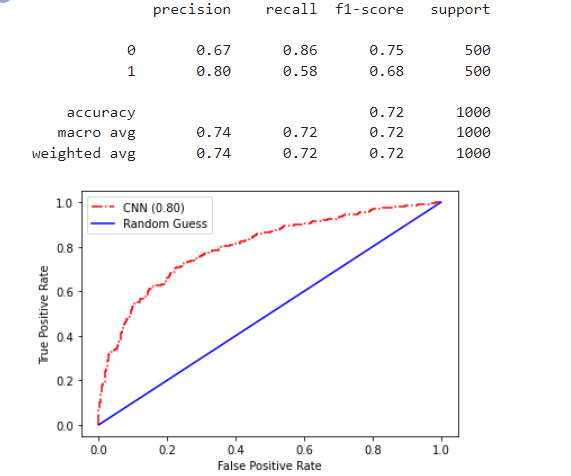

In [32]:
#SOLO DARLE A INTRO SI QUIERO SIMULAR ESTE MODELO

'''
#################### ARQUITECTURA 3 ####################
'''

model = Sequential()

#FEATURE EXTRACTION
layer1 = Conv2D(24, (3,3), activation='relu', input_shape=normed_dims+(3,))
MaxPool1 = MaxPooling2D((2,2))

layer2 = Conv2D(32, (3,3), activation='relu', padding='same')
MaxPool2 = MaxPooling2D((2,2))

layer3 = Conv2D(64, (3,3), activation='relu', padding='same')
MaxPool3 = MaxPooling2D((4,4))


#CLASSIFIER
flatten = Flatten()
drop1 = Dropout(0.5)

layer4 = Dense(128, activation='relu', kernel_regularizer="l2") # regularizador L2
drop2 = Dropout(0.5)

layer5 = Dense(32, activation='relu', kernel_regularizer="l2") # regularizador L2
drop3 = Dropout(0.5)

output = Dense(2, activation='softmax')


#MODELO
model.add(layer1)
model.add(MaxPool1)
model.add(layer2)
model.add(MaxPool2)
model.add(layer3)
model.add(MaxPool3)


model.add(flatten)
model.add(drop1)
model.add(layer4)
model.add(drop2)
model.add(layer5)
model.add(drop3)
model.add(output)

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [91]:
#SOLO DARLE A INTRO SI QUIERO SIMULAR ESTE MODELO

'''
#################### ARQUITECTURA 3 ####################
'''
def define_model_3():
  model = Sequential()

  #FEATURE EXTRACTION
  layer1 = Conv2D(24, (3,3), activation='relu', input_shape=normed_dims+(3,))
  MaxPool1 = MaxPooling2D((2,2))

  layer2 = Conv2D(32, (3,3), activation='relu', padding='same')
  MaxPool2 = MaxPooling2D((2,2))

  layer3 = Conv2D(64, (3,3), activation='relu', padding='same')
  MaxPool3 = MaxPooling2D((4,4))


  #CLASSIFIER
  flatten = Flatten()
  drop1 = Dropout(0.5)

  layer4 = Dense(128, activation='relu', kernel_regularizer="l2") # regularizador L2
  drop2 = Dropout(0.5)

  layer5 = Dense(32, activation='relu', kernel_regularizer="l2") # regularizador L2
  drop3 = Dropout(0.5)

  output = Dense(2, activation='softmax')


  #MODELO
  model.add(layer1)
  model.add(MaxPool1)
  model.add(layer2)
  model.add(MaxPool2)
  model.add(layer3)
  model.add(MaxPool3)


  model.add(flatten)
  model.add(drop1)
  model.add(layer4)
  model.add(drop2)
  model.add(layer5)
  model.add(drop3)
  model.add(output)

  model.compile(loss='categorical_crossentropy',
#                optimizer="adam",
                optimizer="rmsprop",
                metrics=['accuracy'])
  
  return model
'''
  optimizer="rmsprop",
              metrics=['accuracy'])
'''

'\n  optimizer="rmsprop",\n              metrics=[\'accuracy\'])\n'

Luego borrar estas fotos:
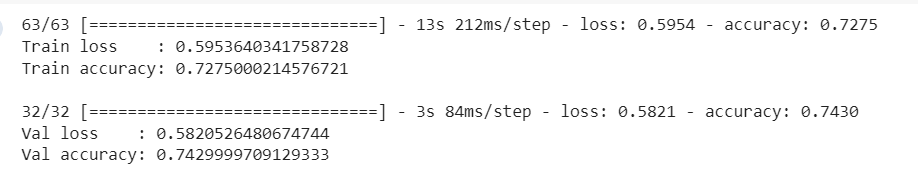
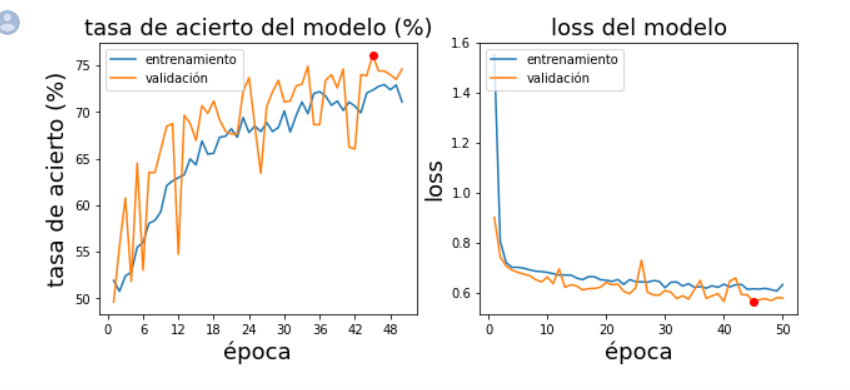

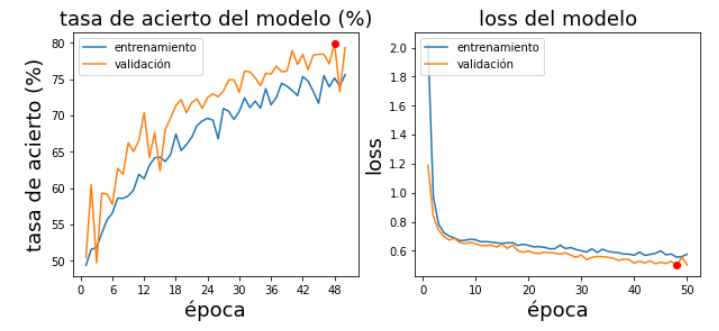
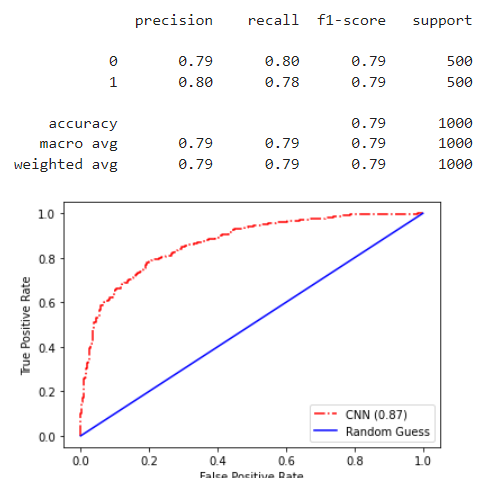

#Resumen arquitectura

In [92]:
#model = define_model_1()
#model = define_model_2()
model = define_model_3()

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 24)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 74, 74, 32)        6944      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 64)        

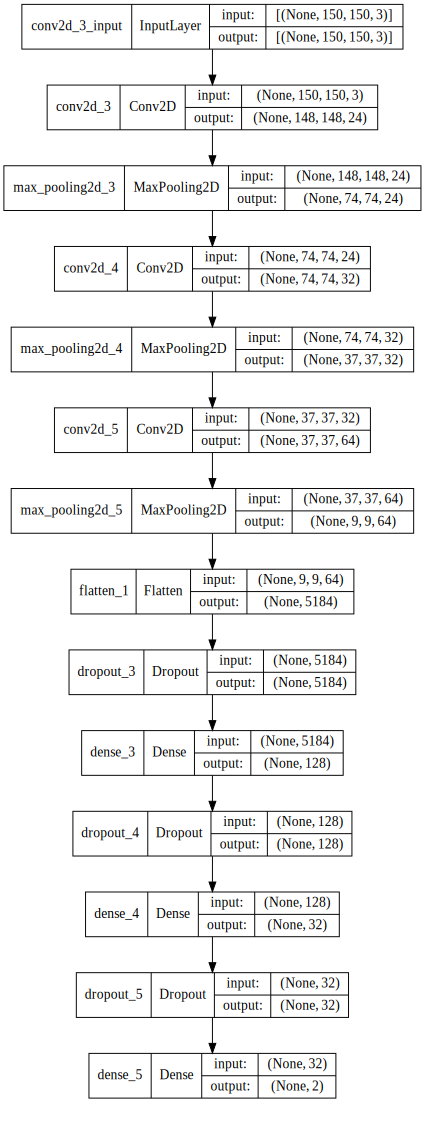

In [39]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True,dpi=70).create(prog='dot', format='svg'))

# DataAumentation

In [73]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='mirror',
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen  = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocess_input)

In [74]:
#le indico donde estan esas imagenes
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir, #directorio definido arriba
    target_size=normed_dims, #tamaño imagenes
    batch_size=batch_size, #tamaño lote
    shuffle=True, #mestras aleatoriias
    class_mode='categorical') # binary, categorical, sparse /cada carpeta una categoria

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False, #solo voy a monitorizar, sacar score
    class_mode='categorical') # binary, categorical, sparse

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

# 

# Train

In [93]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

In [94]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [95]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n

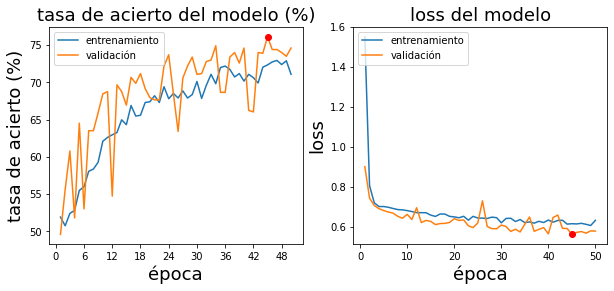

In [96]:
epochs = 50

modelpath="model_current_best_parte3.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit(train_generator, 
                        steps_per_epoch=number_train_samples // batch_size,
                        epochs=1,
                        callbacks=callbacks_list,
                        verbose=1,
                        shuffle = False,
                        validation_data=validation_generator,
                        validation_steps=number_val_samples // batch_size
                       )
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
  
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [97]:
'''
Score Arquitectura 1
'''
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

63/63 [==============================] - 13s 212ms/step - loss: 0.5954 - accuracy: 0.7275
Train loss    : 0.5953640341758728
Train accuracy: 0.7275000214576721

32/32 [==============================] - 3s 84ms/step - loss: 0.5821 - accuracy: 0.7430
Val loss    : 0.5820526480674744
Val accuracy: 0.7429999709129333



In [ ]:
'''
Score Arquitectura 2
'''
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

63/63 [==============================] - 13s 209ms/step - loss: 0.6669 - accuracy: 0.5700
Train loss    : 0.6668898463249207
Train accuracy: 0.5699999928474426

32/32 [==============================] - 3s 84ms/step - loss: 0.6590 - accuracy: 0.5830
Val loss    : 0.6590455174446106
Val accuracy: 0.5830000042915344



In [47]:
'''
Score Arquitectura 3
'''
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

63/63 [==============================] - 13s 212ms/step - loss: 0.6050 - accuracy: 0.7105
Train loss    : 0.604996383190155
Train accuracy: 0.7105000019073486

32/32 [==============================] - 3s 87ms/step - loss: 0.5838 - accuracy: 0.7290
Val loss    : 0.5837684869766235
Val accuracy: 0.7289999723434448



In [ ]:
'''
Score Arquitectura 3 - con otro optimizador
'''
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

63/63 [==============================] - 13s 211ms/step - loss: 0.6002 - accuracy: 0.7115
Train loss    : 0.6002107858657837
Train accuracy: 0.7114999890327454

32/32 [==============================] - 3s 83ms/step - loss: 0.5962 - accuracy: 0.7130
Val loss    : 0.5962365865707397
Val accuracy: 0.7129999995231628



In [ ]:
#Predict


              precision    recall  f1-score   support

           0       0.69      0.89      0.78       500
           1       0.84      0.60      0.70       500

    accuracy                           0.74      1000
   macro avg       0.77      0.74      0.74      1000
weighted avg       0.77      0.74      0.74      1000



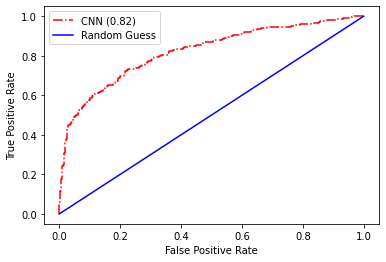

In [98]:
y_real = validation_generator.classes
y_pred_proba = model.predict(validation_generator)
y_pred = np.argmax(y_pred_proba, axis=1)
print('')
print(classification_report(y_real, y_pred))

clase_positiva = 1
fpr, tpr, thresholds = roc_curve(y_real==clase_positiva, y_pred_proba[:,clase_positiva])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();

# Feature maps

In [ ]:
validation_generator.reset()
X_te, y_te = validation_generator.next()
X_te.shape

(32, 150, 150, 3)

In [ ]:
imagen = X_te[10]
imagen.shape

(150, 150, 3)

In [ ]:
class_indices = validation_generator.class_indices
class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
# Now we extract the outputs of the top 6 layers:
ejemplo = 9
layer_outputs = [layer.output for layer in model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(X_te[ejemplo:(ejemplo+1)])

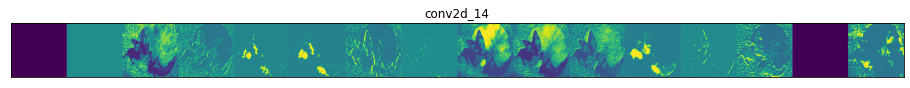

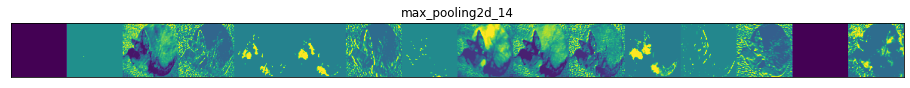

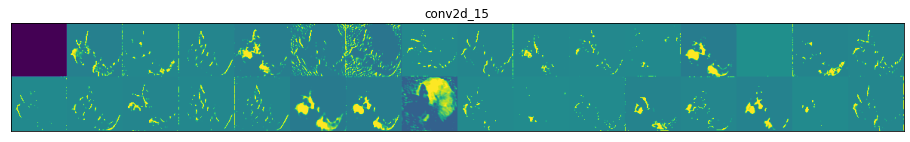

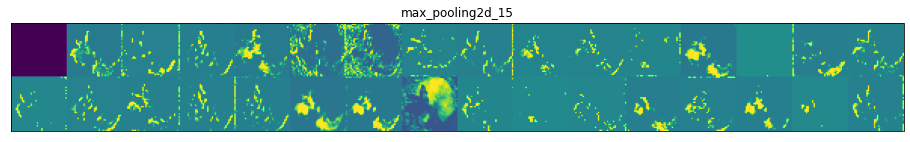

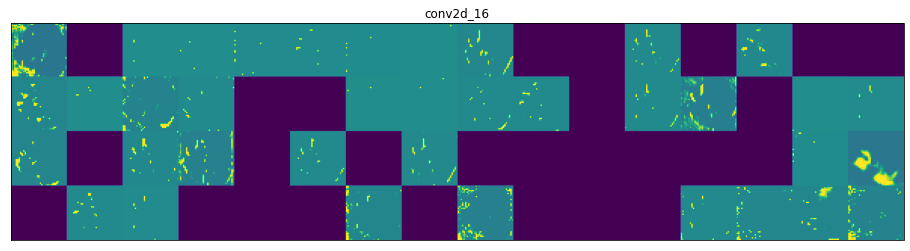

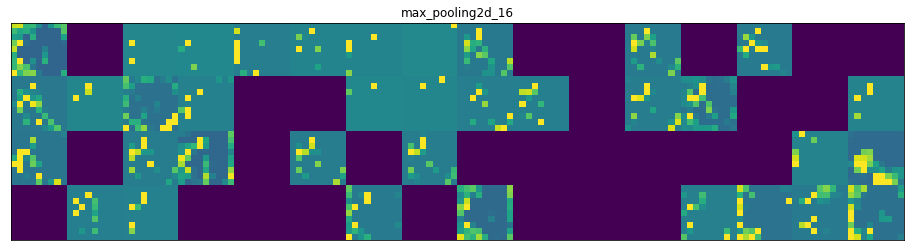

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#parece que aprende el pelo, el contorno

#Transfer learnig : ResNet50

In [100]:

from tensorflow.keras.applications.resnet50 import ResNet50

In [101]:
# Define model
model_resnet = Sequential()
# Add pre-trained weights
model_resnet.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))

model_resnet.add(Dense(2, activation='softmax'))
# Since we load pre-trained model we must specify first layer as non-trainable
model_resnet.layers[0].trainable = True

94781440/94765736 [==============================] - 1s 0us/step


In [102]:
# Compile model
model_resnet.compile(
    optimizer='sgd', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

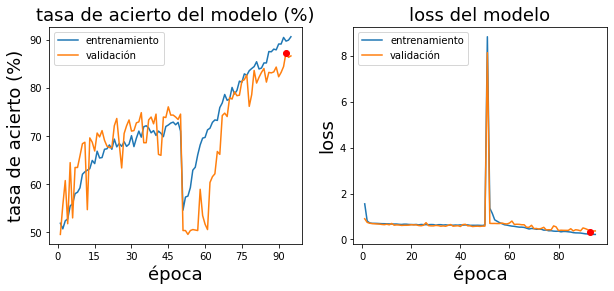

35/62 [===============>..............] - ETA: 7s - loss: 0.2040 - accuracy: 0.9205

KeyboardInterrupt: ignored

In [106]:
epochs = 50

modelpath="model_current_best_parte3.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model_resnet.fit(train_generator, 
                        steps_per_epoch=number_train_samples // batch_size,
                        epochs=1,
                        callbacks=callbacks_list,
                        verbose=1,
                        shuffle = False,
                        validation_data=validation_generator,
                        validation_steps=number_val_samples // batch_size
                       )
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
  
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [ ]:
#¿con esta arquitectura  igual hay que hacer STOP EARLY?

In [109]:
'''
Score ResNet50
'''
scores_tr = model_resnet.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model_resnet.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

63/63 [==============================] - 16s 248ms/step - loss: 0.2457 - accuracy: 0.9180
Train loss    : 0.24574001133441925
Train accuracy: 0.9179999828338623

32/32 [==============================] - 4s 115ms/step - loss: 0.4195 - accuracy: 0.8750
Val loss    : 0.419547438621521
Val accuracy: 0.875




              precision    recall  f1-score   support

           0       0.86      0.89      0.88       500
           1       0.89      0.86      0.87       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.87      1000
weighted avg       0.88      0.88      0.87      1000



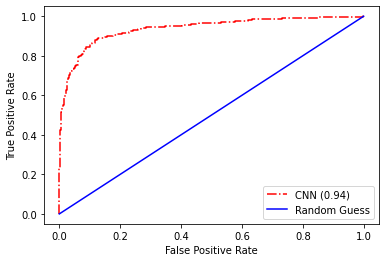

In [110]:
y_real = validation_generator.classes
y_pred_proba = model_resnet.predict(validation_generator)
y_pred = np.argmax(y_pred_proba, axis=1)
print('')
print(classification_report(y_real, y_pred))

clase_positiva = 1
fpr, tpr, thresholds = roc_curve(y_real==clase_positiva, y_pred_proba[:,clase_positiva])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();